<a href="https://colab.research.google.com/github/hau17/ptdl-python/blob/main/DA04/Feature_Engineering_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets

In [ ]:
# Load dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
data_df = pd.DataFrame(X, columns=X.columns)

data_df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Modelling

In [ ]:
model = DecisionTreeClassifier(max_depth=4, )

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Prediction and Evaluation

In [ ]:
y_pred = model.predict(X_test)

print(f"Classification report for DecisionTree:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for DecisionTree:
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45




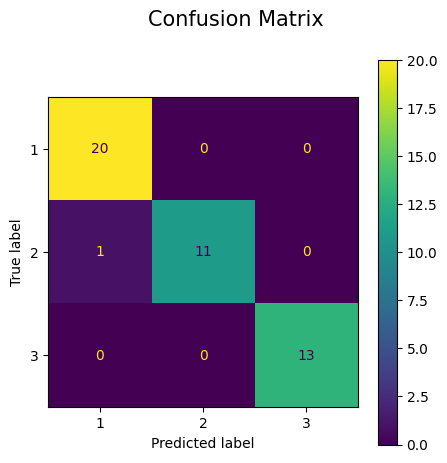

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
ax = plt.gca()
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
_ = disp.figure_.suptitle("Confusion Matrix", fontsize=15)

Kết quả
* Lớp 0: Mô hình dự đoán đúng 20 lần (19 ở ô [0, 0]) và không nhầm lẫn với lớp nào khác.
* Lớp 1: Mô hình dự đoán đúng 11 lần (11 ở ô [1, 1]) nhưng bị nhầm lẫn 1 lần sang Lớp  (1 ở ô [1, 0]).
* Lớp 2: Mô hình dự đoán đúng 13 lần (13 ở ô [2, 2]) và không nhầm lẫn với lớp nào khác.

Đánh giá:
* Ma trận này xác nhận độ chính xác tổng thể (accuracy) là 0.98. Mô hình hoạt động rất tốt với Lớp 0 (precision, recall, f1-score đều là 1.00) và có hiệu suất cao (trên 0.92) với Lớp 1 và Lớp 2.

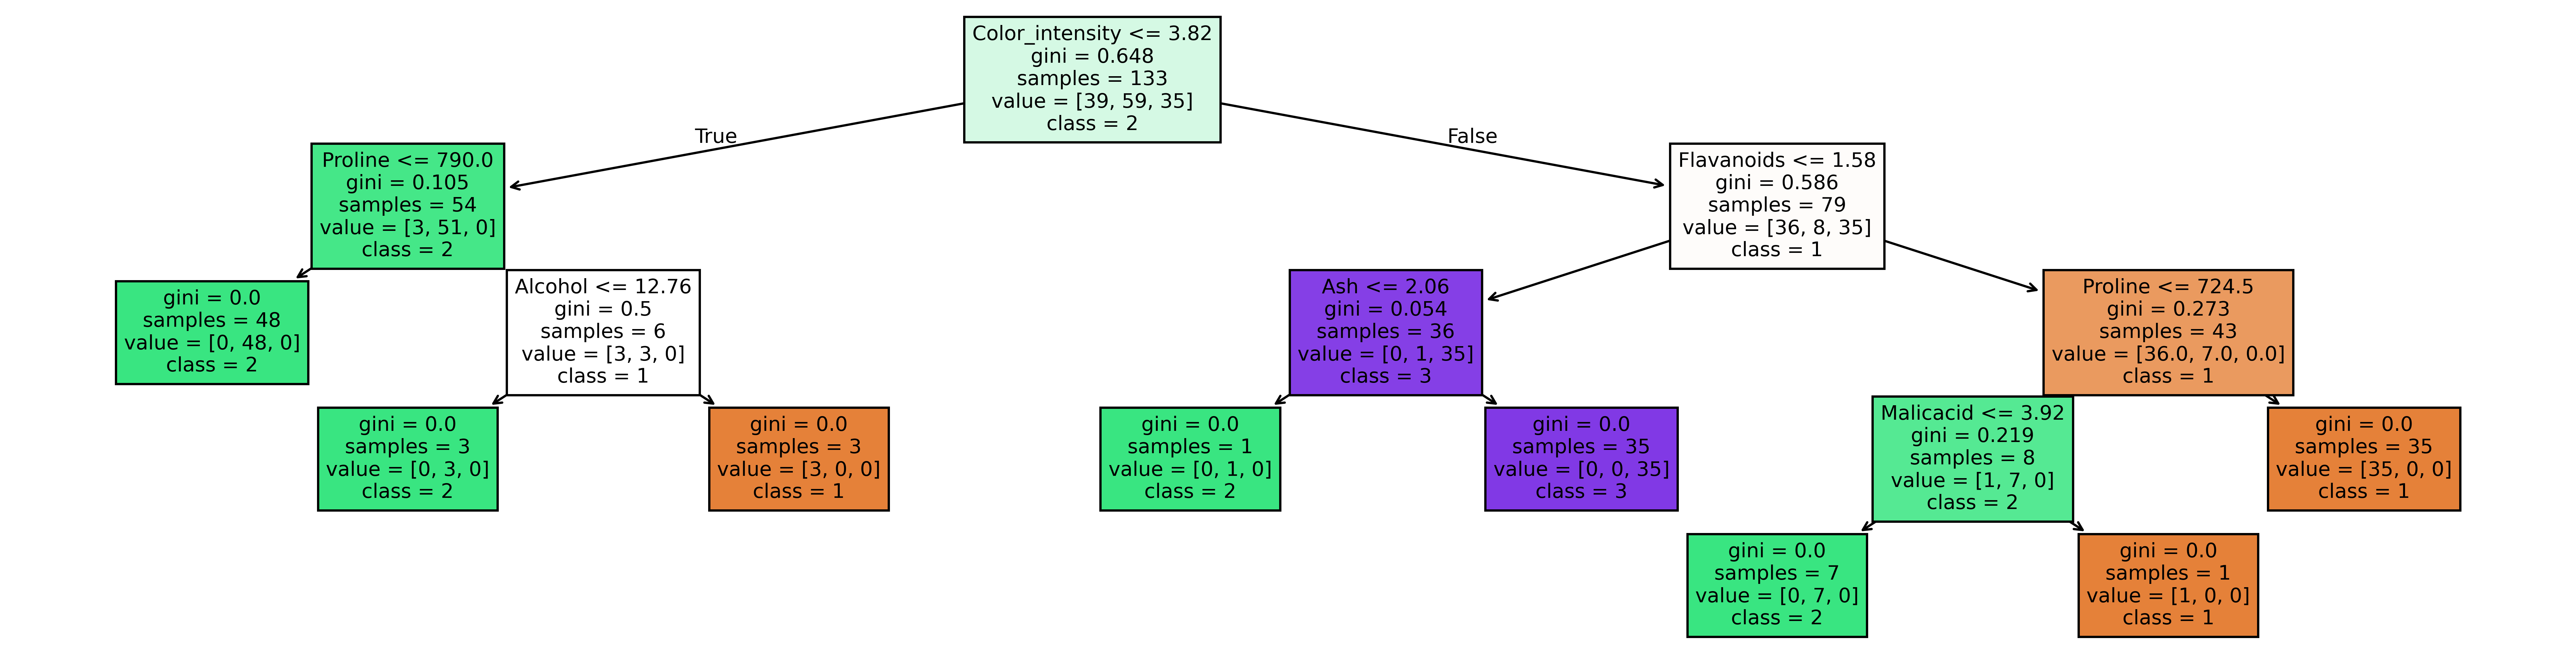

In [ ]:
# Show Decision Tree Decision

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5), dpi=500)
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=y['class'].unique().astype(str),
               filled=True)
plt.show()

Đặc điểm
* Các điểm chia (Splits): Cây sử dụng các đặc trưng như color_intensity , proline , và flavanoids  để tạo ra các quyết định phân loại. Ví dụ, nút gốc chia dữ liệu dựa trên color intensity <= 3.82.
* Độ tinh khiết (Gini): Mỗi nút hiển thị giá trị Gini (chỉ số đo sự không tinh khiết). Giá trị Gini bằng 0.0 (như ở các nút lá) cho thấy nút đó đã đạt độ tinh khiết hoàn toàn, nghĩa là tất cả các mẫu trong nút đều thuộc cùng một lớp.

Mục đích:
* Biểu đồ giúp người dùng hiểu được luật phân loại nào đang được mô hình sử dụng để đi đến quyết định cuối cùng.

## Decision boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

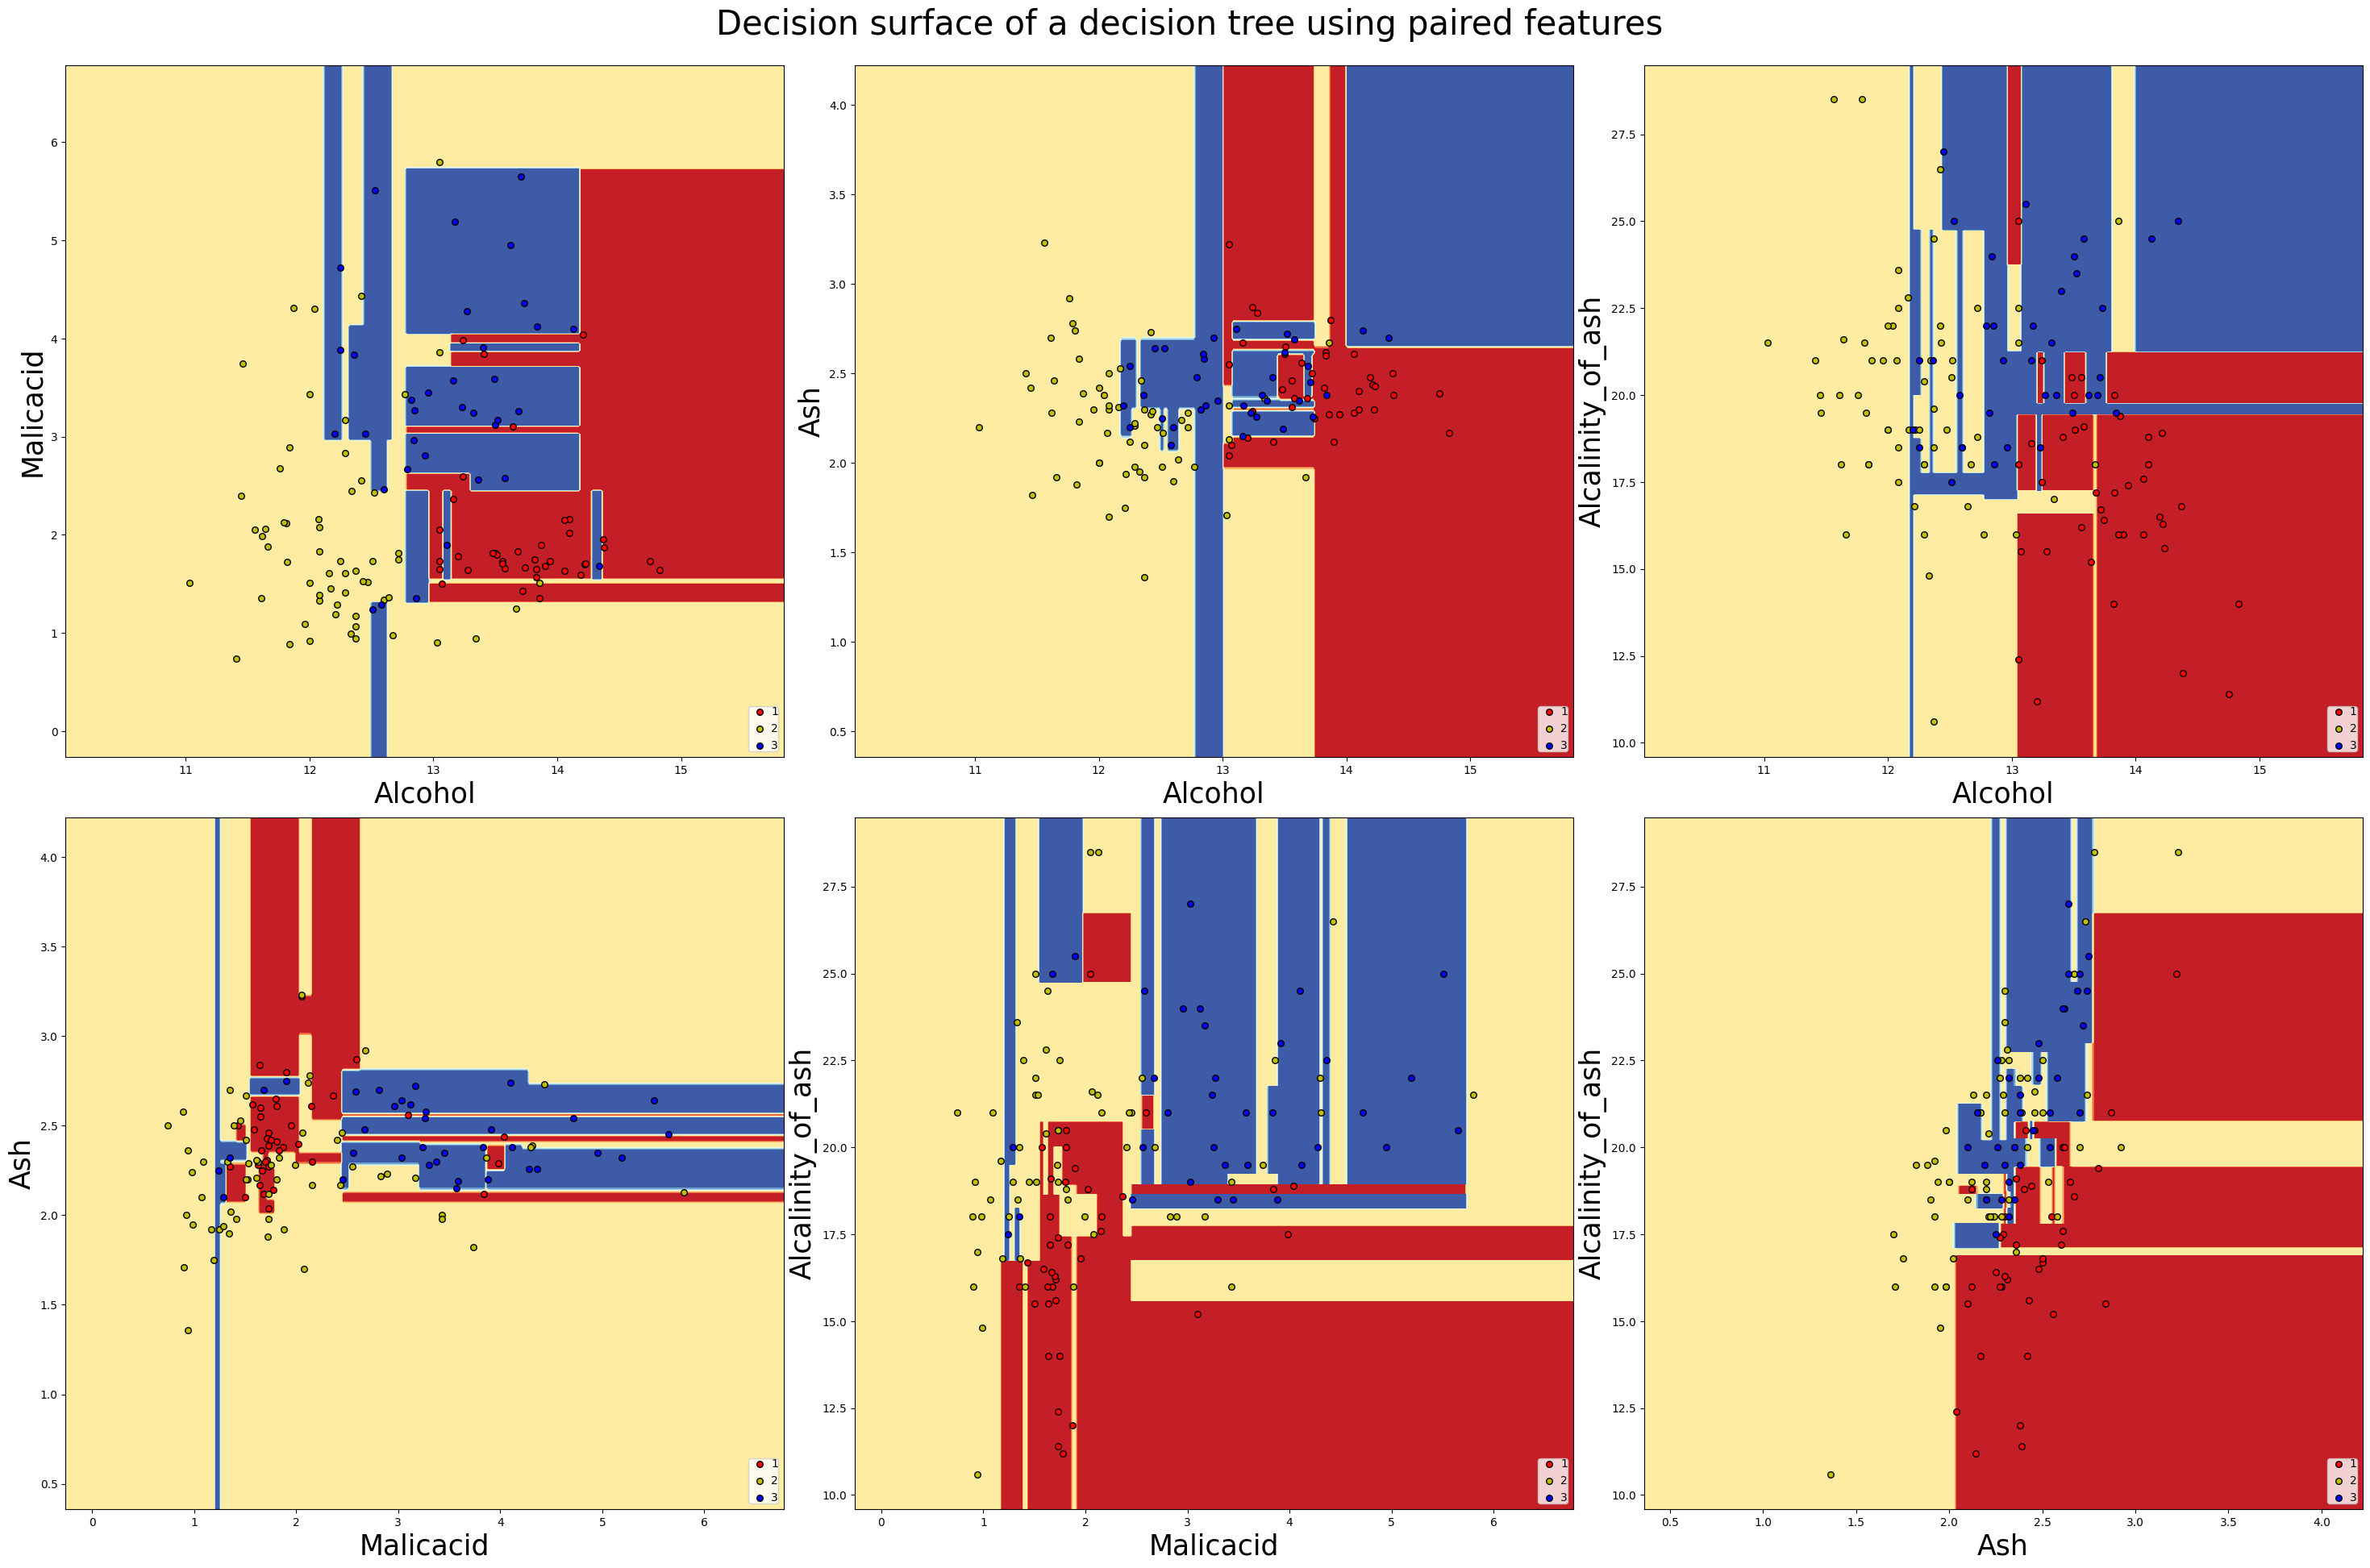

In [ ]:
# Plot the decision boundary

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
font = {'size' : 25}
plt.figure(figsize=(30, 20))
plt.suptitle("Decision surface of a decision tree using paired features", **{'size': 30})
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    plt.subplot(2, 3, pairidx + 1)
    X_pair = X_train.iloc[:, pair] # Use iloc to select columns by index
    clf = DecisionTreeClassifier().fit(X_pair, y_train)
    x_min, x_max = X_pair.iloc[:, 0].min() - 1, X_pair.iloc[:, 0].max() + 1
    y_min, y_max = X_pair.iloc[:, 1].min() - 1, X_pair.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(X.columns[pair[0]], **font) # Use X.columns for feature names
    plt.ylabel(X.columns[pair[1]], **font) # Use X.columns for feature names
    # Show the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == (i + 1)) # Adjust index for target names
        plt.scatter(X_pair.iloc[idx[0], 0], X_pair.iloc[idx[0], 1], c=color, label=y['class'].unique()[i], # Use y['class'].unique() for class names
                    edgecolor='black', s=30)
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)

plt.show() # Add plt.show() to display the plot

Đặc điểm
* Hình dạng: Bề mặt quyết định của Cây Quyết Định luôn là những hình chữ nhật được sắp xếp theo trục tọa độ, tạo thành các bước thang (piecewise constant). Điều này minh họa cách Cây Quyết Định chia không gian đặc trưng bằng các đường thẳng song song với các trục.
* Phân vùng: Sự phân vùng rõ ràng (màu đỏ, vàng, xanh) cho thấy Cây Quyết Định tạo ra các vùng riêng biệt cho từng lớp, đôi khi có những vùng nhỏ bị cô lập, cho thấy mô hình cố gắng phân loại ngay cả những điểm dữ liệu nằm ngoài vùng chính.

Mục đích
* Biểu đồ này giúp trực quan hóa ranh giới quyết định của mô hình trong không gian 2D, cho thấy mức độ phức tạp của sự phân chia.